<h1 style="text-align:center;"> BDD100K Data Analysis </h1>

Load annotations

In [1]:
import json

train_labels_path = '/workspace/data_store/assignment_data_bdd/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json'
val_labels_path = '/workspace/data_store/assignment_data_bdd/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json'


def load_labels(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

#loading labels
train_data = load_labels(train_labels_path)
val_data = load_labels(val_labels_path)


Analysing labels data and key elements

In [2]:
print(type(train_data)), print(type(val_data))
len(train_data), len(val_data)

<class 'list'>
<class 'list'>


(69863, 10000)

In [3]:
img_idx = 0  # Index of the image to inspect
label_idx = 1  # Index of the label to inspect within the image
print(f"Inspecting image index: {img_idx}, label index: {label_idx}")
print(type(train_data[img_idx]))
print(train_data[img_idx].keys())
print(train_data[img_idx]['name'])
print('image attributes: ',train_data[img_idx]['attributes'])
print(train_data[img_idx]['timestamp'])
print(type(train_data[img_idx]['labels']))
print(len(train_data[img_idx]['labels']))
print(type(train_data[img_idx]['labels'][label_idx]))
print(train_data[img_idx]['labels'][label_idx].keys())
print(train_data[img_idx]['labels'][label_idx]['id'])
print(train_data[img_idx]['labels'][label_idx]['category'])
print(train_data[img_idx]['labels'][label_idx]['attributes'])
print(train_data[img_idx]['labels'][label_idx]['manualShape'])
print(train_data[img_idx]['labels'][label_idx]['manualAttributes'])
print(train_data[img_idx]['labels'][label_idx]['box2d'])

Inspecting image index: 0, label index: 1
<class 'dict'>
dict_keys(['name', 'attributes', 'timestamp', 'labels'])
0000f77c-6257be58.jpg
image attributes:  {'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}
10000
<class 'list'>
11
<class 'dict'>
dict_keys(['category', 'attributes', 'manualShape', 'manualAttributes', 'box2d', 'id'])
1
traffic light
{'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}
True
True
{'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}


visualizing bounding box on image

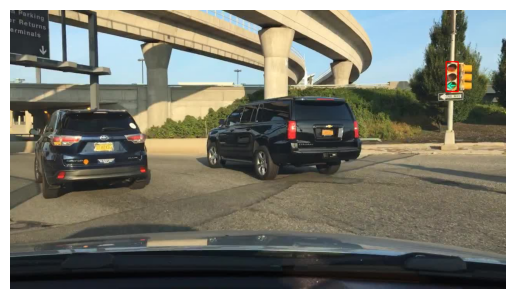

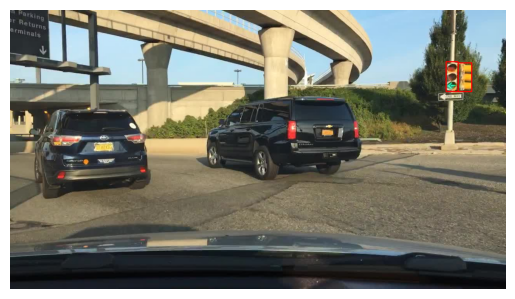

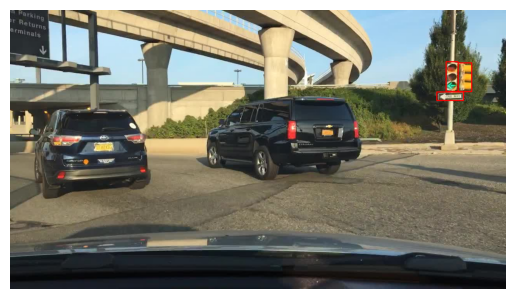

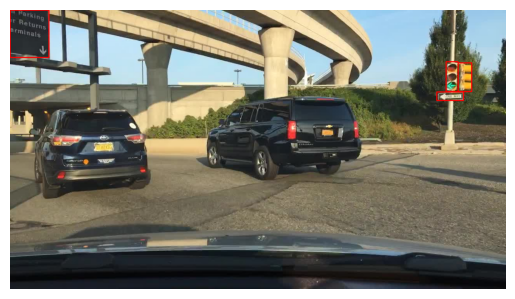

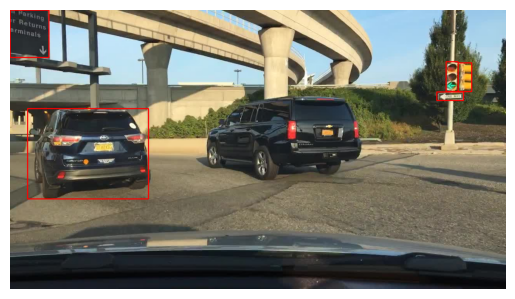

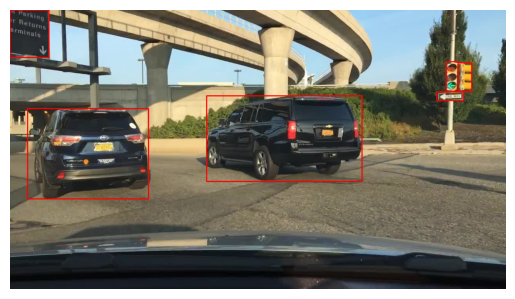

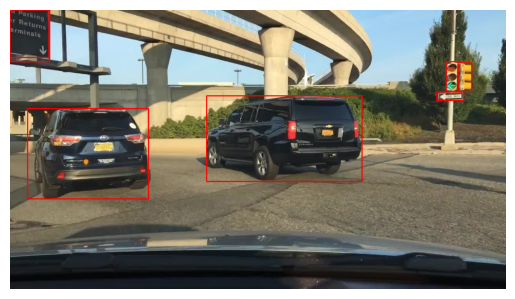

In [4]:
#visualizing bounding box on image
import cv2
import matplotlib.pyplot as plt

def plot_image_with_bbox(image, bbox):
    if image is None:
        print(f"Error: Could not load image")
        return
    
    
    x1, y1, x2, y2 = int(bbox['x1']), int(bbox['y1']), int(bbox['x2']), int(bbox['y2'])
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return image


image_base_path = '/workspace/data_store/assignment_data_bdd/bdd100k_images_100k/bdd100k/images/100k/train/' 

image_path = image_base_path + train_data[img_idx]['name']
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for label_idx in range(len(train_data[img_idx]['labels'])):
    try:
        bbox = train_data[img_idx]['labels'][label_idx]['box2d']
        image=plot_image_with_bbox(image, bbox)
    except KeyError:
        # import pdb; pdb.set_trace()
        pass

    

check if every label has same keys

In [5]:
#check if every label has same keys
train_keys =[]
for idx in range(len(train_data)):
    check=train_data[idx].keys()
    if check not in train_keys:
        train_keys.append(check)

train_keys


[dict_keys(['name', 'attributes', 'timestamp', 'labels'])]

check if image attributes are same for all images

In [6]:
print(train_data[0]['attributes'])
#check if image attributes are same for all images
attr_keys =[]
for idx in range(len(train_data)):
    check=train_data[idx]['attributes'].keys()
    if check not in attr_keys:
        attr_keys.append(check)
print(attr_keys)



{'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}
[dict_keys(['weather', 'scene', 'timeofday'])]


check if what key values take different values

In [7]:
#check if what key values take different values
attr_values ={}
for idx in range(len(train_data)):
    for key in train_data[idx]['attributes'].keys():
        value = train_data[idx]['attributes'][key]
        if key not in attr_values:
            attr_values[key] = set(value)
        else:
            attr_values[key].add(value)
        
for key, values in attr_values.items():
    print(f"{key}: {values}")       

weather: {'rainy', 'c', 'r', 'undefined', 'e', 'overcast', 'partly cloudy', 'clear', 'snowy', 'foggy', 'l', 'a'}
scene: {'residential', 'tunnel', 'gas stations', 'c', 'r', 'i', 'undefined', 'e', 'y', 'parking lot', 's', 'city street', 'highway', 't', ' '}
timeofday: {'d', 'dawn/dusk', 'i', 'undefined', 'e', 'y', 'night', 'daytime', 'm', 't', 'a'}


check if every label has same keys in all images

In [8]:
print(train_data[0]['labels'][0].keys())

#check if every label has same keys in all images
label_keys =[]
for img_idx in range(len(train_data)):
    for label_idx in range(len(train_data[img_idx]['labels'])):
        check=train_data[img_idx]['labels'][label_idx].keys()
        if check not in label_keys:
            label_keys.append(check)

label_keys

dict_keys(['category', 'attributes', 'manualShape', 'manualAttributes', 'box2d', 'id'])


[dict_keys(['category', 'attributes', 'manualShape', 'manualAttributes', 'box2d', 'id']),
 dict_keys(['category', 'attributes', 'manualShape', 'manualAttributes', 'poly2d', 'id'])]

get all categories in labels from all images

In [9]:
#check if all categories in labels have from all images

categories_box = set()
categories_poly = set()
for img_idx in range(len(train_data)):
    for label_idx in range(len(train_data[img_idx]['labels'])):
        if 'box2d' in train_data[img_idx]['labels'][label_idx]:
            category = train_data[img_idx]['labels'][label_idx]['category']
            categories_box.add(category)
        elif 'poly2d' in train_data[img_idx]['labels'][label_idx]:
            category = train_data[img_idx]['labels'][label_idx]['category']
            categories_poly.add(category)

print(categories_box)
print(categories_poly)

{'person', 'bike', 'rider', 'car', 'truck', 'train', 'motor', 'bus', 'traffic sign', 'traffic light'}
{'drivable area', 'lane'}


check lable attributes keys and values

In [10]:
#check lable attributes keys and values
label_attr_keys =[]
label_attr_values = {}
for img_idx in range(len(train_data)):
    for label_idx in range(len(train_data[img_idx]['labels'])):
        attributes = train_data[img_idx]['labels'][label_idx]['attributes']
        for key, value in attributes.items():
            if key not in label_attr_keys:
                label_attr_keys.append(key)
            if key not in label_attr_values:
                label_attr_values[key] = set()
            label_attr_values[key].add(value)


print(label_attr_keys)
for key, values in label_attr_values.items():
    print(f"{key}: {values}")

['occluded', 'truncated', 'trafficLightColor', 'areaType', 'laneDirection', 'laneStyle', 'laneType']
occluded: {False, True}
truncated: {False, True}
trafficLightColor: {'none', 'yellow', 'red', 'green'}
areaType: {'direct', 'alternative'}
laneDirection: {'parallel', 'vertical'}
laneStyle: {'dashed', 'solid'}
laneType: {'single yellow', 'single other', 'crosswalk', 'double yellow', 'single white', 'road curb', 'double white', 'double other'}


check what 'manualShape', 'manualAttributes' takes values

In [11]:
# check what 'manualShape', 'manualAttributes' takes values
manualShape_values = set()
manualAttributes_values = set()
for img_idx in range(len(train_data)):
    for label_idx in range(len(train_data[img_idx]['labels'])):
        manualShape = train_data[img_idx]['labels'][label_idx]['manualShape']
        manualAttributes = train_data[img_idx]['labels'][label_idx]['manualAttributes']
        manualShape_values.add(manualShape)
        manualAttributes_values.add(manualAttributes)

print(f"manualShape values: {manualShape_values}")
print(f"manualAttributes values: {manualAttributes_values}")

manualShape values: {True}
manualAttributes values: {True}


image attributes keys and values

In [12]:
#image attributes keys and values
image_attr_keys =[]
image_attr_values = {}
for idx in range(len(train_data)):
    attributes = train_data[idx]['attributes']
    for key, value in attributes.items():
        if key not in image_attr_keys:
            image_attr_keys.append(key)
        if key not in image_attr_values:
            image_attr_values[key] = set()
        image_attr_values[key].add(value)

print(image_attr_keys)
for key, values in image_attr_values.items():
    print(f"{key}: {values}")

['weather', 'scene', 'timeofday']
weather: {'rainy', 'undefined', 'overcast', 'partly cloudy', 'snowy', 'clear', 'foggy'}
scene: {'residential', 'tunnel', 'gas stations', 'undefined', 'city street', 'highway', 'parking lot'}
timeofday: {'dawn/dusk', 'undefined', 'night', 'daytime'}


build dataframe where each row is one label (bounding box / poly) and split image & label attributes into separate columns

In [13]:
# build dataframe where each row is one label (bounding box / poly) and split image & label attributes into separate columns
import pandas as pd
data_rows = []

#Add train data
for img_info in train_data:
    img_attrs = img_info.get('attributes', {})
    for label_info in img_info.get('labels', []):
        row = {
            'image_name': img_info.get('name'),
            'timestamp': img_info.get('timestamp'),
            'label_id': label_info.get('id'),
            'category': label_info.get('category'),
            'manualShape': label_info.get('manualShape'),
            'manualAttributes': label_info.get('manualAttributes'),
            'data_type': "train"
        }

        # split image attributes into separate columns (prefix with image_)
        for k, v in img_attrs.items():
            row[f'image_{k}'] = v

        # split label attributes into separate columns (prefix with label_)
        for k, v in label_info.get('attributes', {}).items():
            row[f'label_{k}'] = v

        # flatten box2d if present (prefix with box2d_)
        if 'box2d' in label_info:
            for k, v in label_info['box2d'].items():
                row[f'box2d_{k}'] = v
        # keep poly2d as-is (list/dict) if present
        if 'poly2d' in label_info:
            row['poly2d'] = label_info['poly2d']

        if 'box2d' in label_info:
            row['shape_type'] = 'box2d'
        elif 'poly2d' in label_info:
            row['shape_type'] = 'poly2d'

        data_rows.append(row)

#Add val data
for img_info in val_data:
    img_attrs = img_info.get('attributes', {})
    for label_info in img_info.get('labels', []):
        row = {
            'image_name': img_info.get('name'),
            'timestamp': img_info.get('timestamp'),
            'label_id': label_info.get('id'),
            'category': label_info.get('category'),
            'manualShape': label_info.get('manualShape'),
            'manualAttributes': label_info.get('manualAttributes'),
            'data_type': "val"
        }

        # split image attributes into separate columns (prefix with image_)
        for k, v in img_attrs.items():
            row[f'image_{k}'] = v

        # split label attributes into separate columns (prefix with label_)
        for k, v in label_info.get('attributes', {}).items():
            row[f'label_{k}'] = v

        # flatten box2d if present (prefix with box2d_)
        if 'box2d' in label_info:
            for k, v in label_info['box2d'].items():
                row[f'box2d_{k}'] = v
        # keep poly2d as-is (list/dict) if present
        if 'poly2d' in label_info:
            row['poly2d'] = label_info['poly2d']

        if 'box2d' in label_info:
            row['shape_type'] = 'box2d'
        elif 'poly2d' in label_info:
            row['shape_type'] = 'poly2d'

        data_rows.append(row)



df = pd.DataFrame(data_rows)
df.head()

,image_name,timestamp,label_id,category,manualShape,manualAttributes,data_type,image_weather,image_scene,image_timeofday,...,box2d_x1,box2d_y1,box2d_x2,box2d_y2,shape_type,label_areaType,poly2d,label_laneDirection,label_laneStyle,label_laneType
0,0000f77c-6257be58.jpg,10000,0,traffic light,True,True,train,clear,city street,daytime,...,1125.902264,133.184488,1156.978645,210.875445,box2d,NaN,NaN,NaN,NaN,NaN
1,0000f77c-6257be58.jpg,10000,1,traffic light,True,True,train,clear,city street,daytime,...,1156.978645,136.637417,1191.507960,210.875443,box2d,NaN,NaN,NaN,NaN,NaN
2,0000f77c-6257be58.jpg,10000,2,traffic sign,True,True,train,clear,city street,daytime,...,1101.731743,211.122087,1170.790370,233.566141,box2d,NaN,NaN,NaN,NaN,NaN
3,0000f77c-6257be58.jpg,10000,3,traffic sign,True,True,train,clear,city street,daytime,...,0.000000,0.246631,100.381647,122.825696,box2d,NaN,NaN,NaN,NaN,NaN
4,0000f77c-6257be58.jpg,10000,4,car,True,True,train,clear,city street,daytime,...,45.240919,254.530367,357.805838,487.906215,box2d,NaN,NaN,NaN,NaN,NaN


#check if annotation type

In [14]:
#check images which as poly2d shapes but no box2d shapes
poly_images = set(df[df['shape_type']=='poly2d']['image_name'])
box_images = set(df[df['shape_type']=='box2d']['image_name'])
poly_only_images = poly_images - box_images
print(f"Number of images with only poly2d shapes: {len(poly_only_images)}")
print(poly_only_images)
#check images which as box2d shapes but no poly2d shapes
box_images = set(df[df['shape_type']=='box2d']['image_name'])
poly_images = set(df[df['shape_type']=='poly2d']['image_name'])
box_only_images = box_images - poly_images
print(f"Number of images with only box2d shapes: {len(box_only_images)}")
print(box_only_images)

Number of images with only poly2d shapes: 0
set()
Number of images with only box2d shapes: 750
{'241aa53c-9cb465d3.jpg', '3caf4d32-2e2da24a.jpg', '612c5ead-948a1613.jpg', 'bcaf73c1-9433521c.jpg', '02086f50-c1e5d802.jpg', 'b00b16aa-379fd986.jpg', '3a868bb9-a218ec20.jpg', 'beea0e03-031a65e7.jpg', 'c44980af-2f8d90c4.jpg', '1358b742-90ffc3bf.jpg', '0780452c-ab3b02cf.jpg', 'a40a674e-7221de10.jpg', '88b6fbc3-5210281c.jpg', 'a80b8af8-ccbcbfbd.jpg', '91845e0c-28a0e359.jpg', '1544026f-dffe91fb.jpg', '4005d947-d5d31a5d.jpg', '75db74df-3761e8fe.jpg', '8a1ed05b-bdea3eef.jpg', '85848aba-21639dce.jpg', '85d81130-bca7067e.jpg', '6d895390-52a1f202.jpg', '6aaf2448-afd81701.jpg', '7e9180c0-beb60f38.jpg', 'b6f4b139-527d7e55.jpg', '496b279f-069399ac.jpg', '70bbe625-b8ec12b1.jpg', '7be4a6b0-c72c64af.jpg', '210b3770-5fa357b4.jpg', '124dd14b-83bb331f.jpg', '1458e4ad-f3ce8d5e.jpg', 'af73f89e-3a50de0d.jpg', '03d93dd6-990f83bb.jpg', '3d39bb11-7a66ac85.jpg', 'a28a677a-34872890.jpg', '2b217f9f-ec3a4a64.jpg', '66c

Remove poly2d rows from dataframe for simplicity

In [15]:
#remove poly2d rows from dataframe for simplicity
df_box = df[df['shape_type']=='box2d'].reset_index(drop=True)
df_box.head()

,image_name,timestamp,label_id,category,manualShape,manualAttributes,data_type,image_weather,image_scene,image_timeofday,...,box2d_x1,box2d_y1,box2d_x2,box2d_y2,shape_type,label_areaType,poly2d,label_laneDirection,label_laneStyle,label_laneType
0,0000f77c-6257be58.jpg,10000,0,traffic light,True,True,train,clear,city street,daytime,...,1125.902264,133.184488,1156.978645,210.875445,box2d,NaN,NaN,NaN,NaN,NaN
1,0000f77c-6257be58.jpg,10000,1,traffic light,True,True,train,clear,city street,daytime,...,1156.978645,136.637417,1191.507960,210.875443,box2d,NaN,NaN,NaN,NaN,NaN
2,0000f77c-6257be58.jpg,10000,2,traffic sign,True,True,train,clear,city street,daytime,...,1101.731743,211.122087,1170.790370,233.566141,box2d,NaN,NaN,NaN,NaN,NaN
3,0000f77c-6257be58.jpg,10000,3,traffic sign,True,True,train,clear,city street,daytime,...,0.000000,0.246631,100.381647,122.825696,box2d,NaN,NaN,NaN,NaN,NaN
4,0000f77c-6257be58.jpg,10000,4,car,True,True,train,clear,city street,daytime,...,45.240919,254.530367,357.805838,487.906215,box2d,NaN,NaN,NaN,NaN,NaN


Check Train/val labels distribution

In [16]:
#check train and val data labels numbers distribution
df_box['data_type'].value_counts()


train    1286871
val       185526
Name: data_type, dtype: int64

In [17]:
#check image files unique names in train and val
print("Unique image names in train data:", df_box[df_box['data_type']=='train']['image_name'].nunique())
print("Unique image names in val data:", df_box[df_box['data_type']=='val']['image_name'].nunique())


Unique image names in train data: 69863
Unique image names in val data: 10000


Category distribution for train and val


data_type       train     val
category                     
bike             7210    1007
bus             11672    1597
car            713211  102506
motor            3002     452
person          91349   13262
rider            4517     649
traffic light  186117   26885
traffic sign   239686   34908
train             136      15
truck           29971    4245


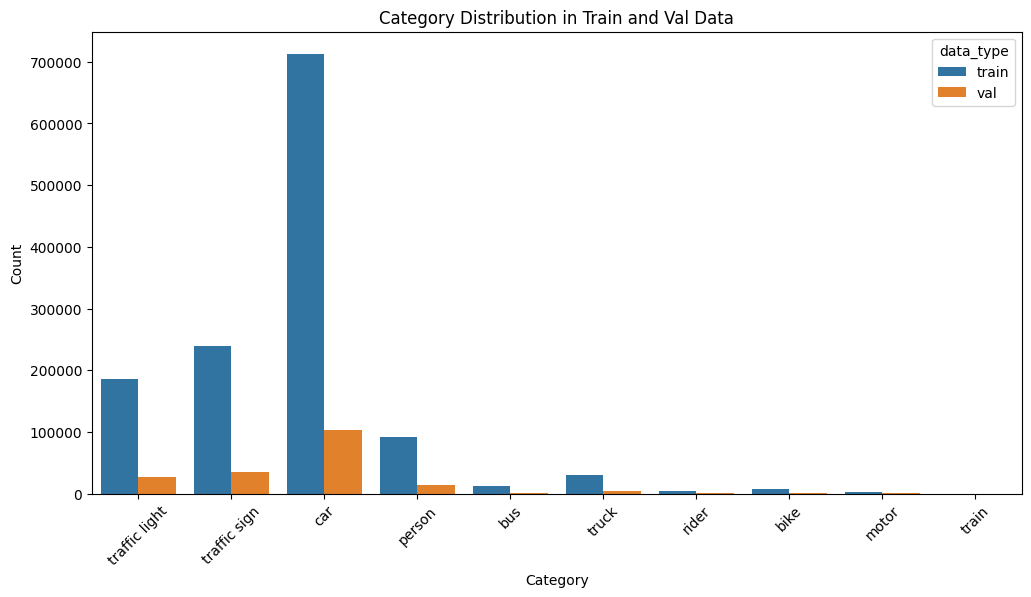

In [18]:
#show category distribution for train and val

#also show into table format
category_counts = df_box.groupby(['category', 'data_type']).size().unstack(fill_value=0)
print(category_counts)


import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(data=df_box, x='category', hue='data_type')
plt.title('Category Distribution in Train and Val Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Check per image label count distribution

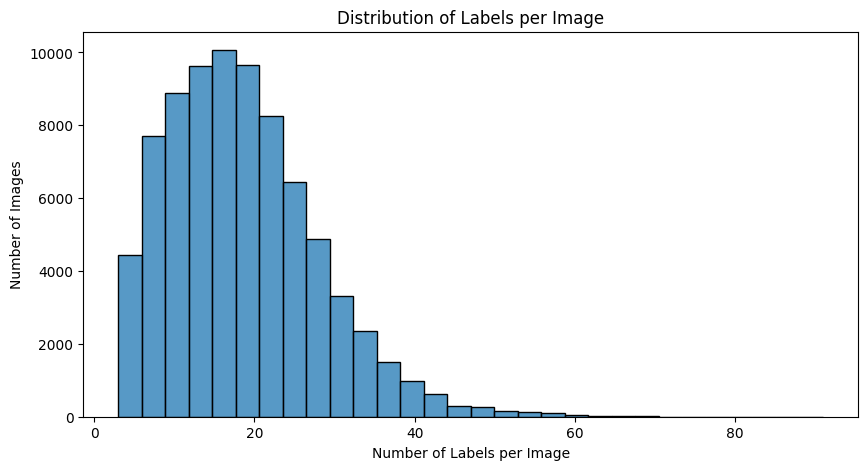

count    79863.000000
mean        18.436535
std          9.616240
min          3.000000
25%         11.000000
50%         17.000000
75%         24.000000
max         91.000000
Name: label_count, dtype: float64
Train Label Count Stats:
count    69863.000000
mean        18.419922
std          9.619078
min          3.000000
25%         11.000000
50%         17.000000
75%         24.000000
max         91.000000
Name: label_count, dtype: float64

Val Label Count Stats:
count    10000.000000
mean        18.552600
std          9.596064
min          3.000000
25%         11.000000
50%         17.000000
75%         24.000000
max         66.000000
Name: label_count, dtype: float64


In [19]:
#check per image label count distribution
labels_per_image = df_box.groupby(['image_name', 'data_type']).size().reset_index(name='label_count')
labels_per_image.head()

#add this label count info back to main dataframe
df_box = df_box.merge(labels_per_image, on=['image_name', 'data_type'], how='left')
df_box.head()

#check label count distribution
plt.figure(figsize=(10,5))
sns.histplot(data=labels_per_image, x='label_count', bins=30, kde=False)
plt.title('Distribution of Labels per Image')
plt.xlabel('Number of Labels per Image')
plt.ylabel('Number of Images')
plt.show()

#show label count stats
label_count_stats = labels_per_image['label_count'].describe()
print(label_count_stats)

#check train and val label count stats separately
train_label_count_stats = labels_per_image[labels_per_image['data_type']=='train']['label_count'].describe()
val_label_count_stats = labels_per_image[labels_per_image['data_type']=='val']['label_count'].describe()
print("Train Label Count Stats:")
print(train_label_count_stats)
print("\nVal Label Count Stats:")
print(val_label_count_stats)


check image_weather	image_scene	image_timeofday	distribution


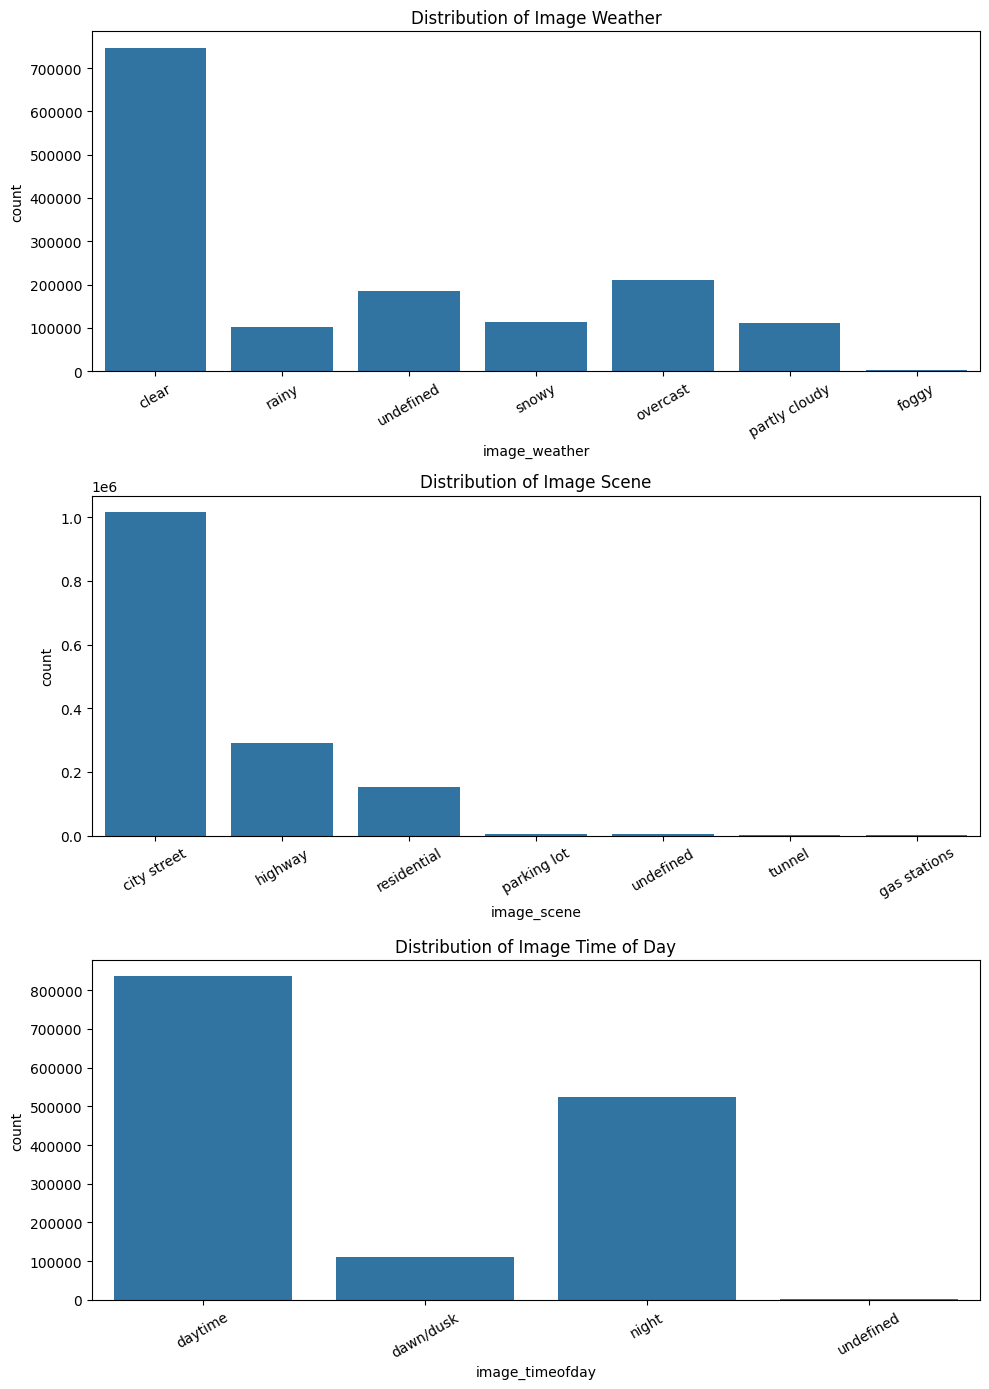

In [20]:
#check image_weather, image_scene, image_timeofday distribution

fig, axes = plt.subplots(3, 1, figsize=(10, 14))

sns.countplot(data=df_box, x='image_weather', ax=axes[0])
axes[0].set_title('Distribution of Image Weather')
axes[0].tick_params(axis='x', rotation=30)

sns.countplot(data=df_box, x='image_scene', ax=axes[1])
axes[1].set_title('Distribution of Image Scene')
axes[1].tick_params(axis='x', rotation=30)

sns.countplot(data=df_box, x='image_timeofday', ax=axes[2])
axes[2].set_title('Distribution of Image Time of Day')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


get labels attribute distribution 'occluded', 'truncated', 'trafficLightColor'

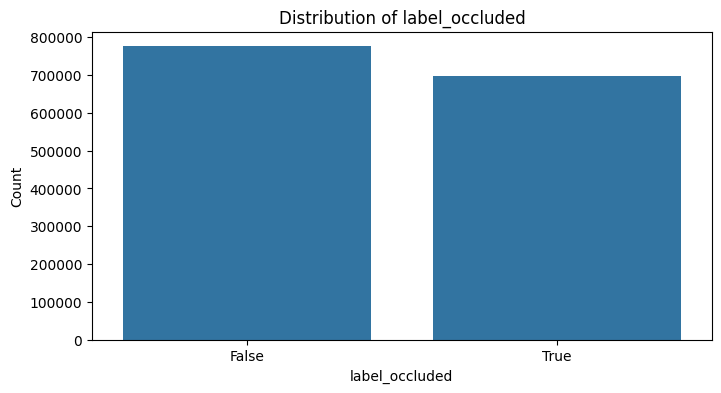

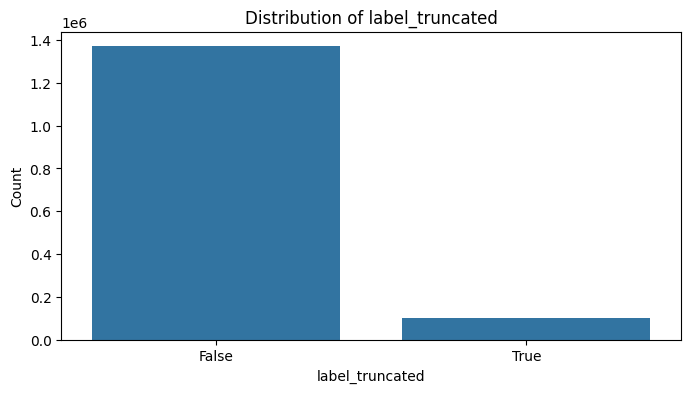

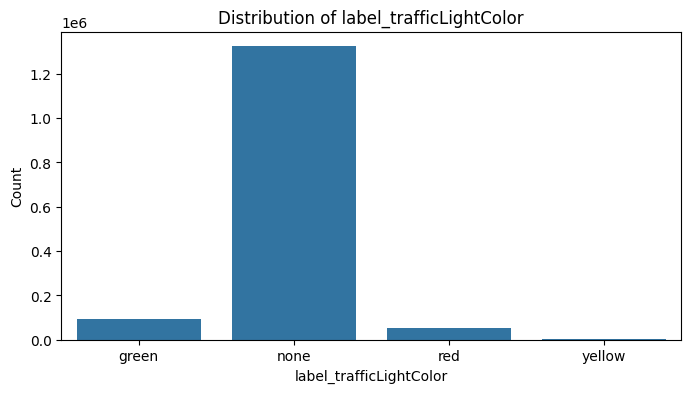

In [21]:
#get labels attribute distribution 'occluded', 'truncated', 'trafficLightColor'
label_attr_cols = ['label_occluded', 'label_truncated', 'label_trafficLightColor']
for col in label_attr_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_box, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


#get  'trafficLightColor' only for traffic light category

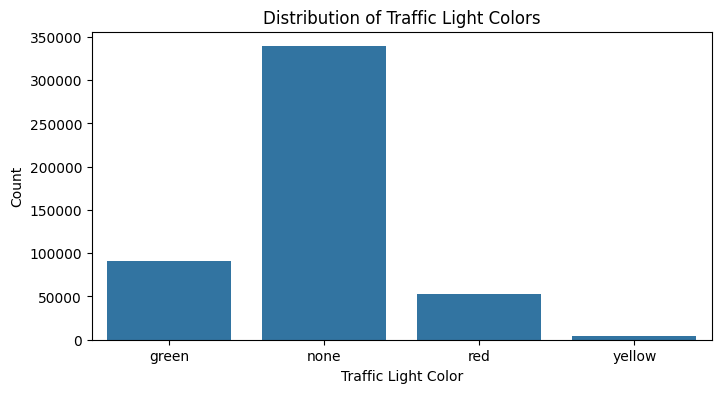

In [22]:
#get  'trafficLightColor' only for traffic light category
traffic_light_df = df_box[(df_box['category']=='traffic light') | (df_box['category']=='traffic sign')]
plt.figure(figsize=(8,4))
sns.countplot(data=traffic_light_df, x='label_trafficLightColor')
plt.title('Distribution of Traffic Light Colors')
plt.xlabel('Traffic Light Color')
plt.ylabel('Count')
plt.show()


In [23]:
#check if any label has 'green' , 'red' ,'yellow' trafficLightColor but category is not 'traffic light' or 'traffic sign'
invalid_traffic_light_labels = df_box[(df_box['label_trafficLightColor'].isin(['green', 'red', 'yellow'])) &
                                     (~df_box['category'].isin(['traffic light', 'traffic sign']))]
print(f"Number of invalid traffic light labels: {len(invalid_traffic_light_labels)}")
print(invalid_traffic_light_labels[['image_name', 'category', 'label_trafficLightColor']])


Number of invalid traffic light labels: 373
                    image_name category label_trafficLightColor
1638     00391a82-8be5b76d.jpg      car                     red
20431    02f1accd-9a9ee2ba.jpg      car                     red
26077    03c28a8d-9fd776c9.jpg    truck                   green
26078    03c28a8d-9fd776c9.jpg      car                   green
28592    043026cb-2808c6fb.jpg      car                   green
...                        ...      ...                     ...
1449918  c775bec8-4c524651.jpg   person                  yellow
1456026  c8618b44-65da0bb3.jpg      car                     red
1463938  c95c7aac-2259b8d6.jpg   person                     red
1466602  c9aa50be-8c87193e.jpg      car                   green
1466603  c9aa50be-8c87193e.jpg      car                   green

[373 rows x 3 columns]


In [24]:
#check if label attributes are same for given image
inconsistent_attr_images = []
for image_name, group in df_box.groupby('image_name'):
    # occluded_values = group['label_occluded'].unique()
    # truncated_values = group['label_truncated'].unique()
    trafficLightColor_values = group['label_trafficLightColor'].unique()
    
    if len(trafficLightColor_values) > 1:
        inconsistent_attr_images.append(image_name)


print(f"Number of images with inconsistent label attributes: {len(inconsistent_attr_images)}")
print(inconsistent_attr_images)

#show some example images with inconsistent label attributes
df_box_inconsistent = df_box[df_box['image_name']=='0000f77c-6257be58.jpg']


Number of images with inconsistent label attributes: 42135
['0000f77c-6257be58.jpg', '0001542f-5ce3cf52.jpg', '0001542f-7c670be8.jpg', '00067cfb-5443fe39.jpg', '00067cfb-caba8a02.jpg', '00067cfb-e535423e.jpg', '00067cfb-f1b91e3c.jpg', '00091078-59817bb0.jpg', '00091078-7cff8ea6.jpg', '00091078-84635cf2.jpg', '00091078-cedbfea7.jpg', '000d35d3-41990aa4.jpg', '000e0252-8523a4a9.jpg', '000f157f-30b30f5e.jpg', '000f157f-37797ff9.jpg', '000f8d37-d4c09a0f.jpg', '0010bf16-9ee17cd9.jpg', '0010bf16-a457685b.jpg', '00131ea7-624f538d.jpg', '001bad4e-2fa8f3b6.jpg', '001c5339-08faca55.jpg', '001c5339-13a07470.jpg', '001c5339-9a6cdd3e.jpg', '00202076-9eaa8e42.jpg', '00207869-902288d1.jpg', '00211b17-ad3e206b.jpg', '00225f53-4200bde2.jpg', '00225f53-67614580.jpg', '00232de3-19eca24a.jpg', '0024b742-83709bd4.jpg', '0024b742-acbed4fb.jpg', '002685b6-856c17f7.jpg', '00268999-0b20ef00.jpg', '00268999-a4b8e39d.jpg', '00268999-cb063914.jpg', '002b485a-3f6603f2.jpg', '002b485a-d1301c7c.jpg', '002cd38e-c7def

In [25]:
df_box_inconsistent.columns


Index(['image_name', 'timestamp', 'label_id', 'category', 'manualShape',
       'manualAttributes', 'data_type', 'image_weather', 'image_scene',
       'image_timeofday', 'label_occluded', 'label_truncated',
       'label_trafficLightColor', 'box2d_x1', 'box2d_y1', 'box2d_x2',
       'box2d_y2', 'shape_type', 'label_areaType', 'poly2d',
       'label_laneDirection', 'label_laneStyle', 'label_laneType',
       'label_count'],
      dtype='object')

In [26]:
# Display specific columns from inconsistent traffic light labels
df_box_inconsistent[['category', 'label_trafficLightColor']]


,category,label_trafficLightColor
0,traffic light,green
1,traffic light,green
2,traffic sign,none
3,traffic sign,none
4,car,none
5,car,none
6,traffic sign,none


In [27]:
just stop

SyntaxError: invalid syntax (300970525.py, line 1)

Check if lables boxes are withing image size bound

In [29]:
# #Check if lables boxes are withing image size bound
# import cv2
# image_base_path = '/workspace/data_store/assignment_data_bdd/bdd100k_images_100k/bdd100k/images/100k/' 

# cnt=0
# label_issues_file=[]
# has_label_issue="No"
# tt=len(df_box['image_name'].unique())
# image_width_height={}

# for flname in df_box['image_name'].unique():
#     cnt+=1

#     # if cnt<17000:
#     #     continue
#     #get labels
#     df_labels=df_box[df_box['image_name']==flname]
#     #get data_type
#     dtype=df_labels['data_type'].unique()[0]

#     #read image 
#     file_path=image_base_path+dtype+'/'+flname
#     image = cv2.imread(file_path)
#     (imgh,imgw,ch)=image.shape

#     if flname not in image_width_height:
#         image_width_height[flname]=(imgh, imgw)

#     for idx, row in df_labels.iterrows():
#         x1, y1, x2, y2 = float(row['box2d_x1']), float(row['box2d_y1']), float(row['box2d_x2']), float(row['box2d_y2'])
#         if x1 < 0 or y1 < 0 or x2 > imgw or y2 > imgh:
#             print(f"Label out of bounds in image {flname}")
#             has_label_issue="Yes"
#             label_issues_file.append(flname)

#     if cnt%1000==0:
#         print(f'completed checking {cnt}/{tt}')
#         #save dict of image width height
#         import pickle
#         with open('image_width_height.pkl', 'wb') as f:
#             pickle.dump(image_width_height, f)
#     # break

# print("Are labels in boundary: ",has_label_issue)
# print("images having box issues: ", label_issues_file)

# #save dict of image width height
# import pickle
# with open('image_width_height.pkl', 'wb') as f:
#     pickle.dump(image_width_height, f)


In [30]:
#save image width height to dataframe
import pickle
with open('image_width_height.pkl', 'rb') as f:
    image_width_height = pickle.load(f)
# print(image_width_height)

df_box['image_width'] = df_box['image_name'].map(lambda x: image_width_height[x][1])
df_box['image_height'] = df_box['image_name'].map(lambda x: image_width_height[x][0])
df_box.head()

,image_name,timestamp,label_id,category,manualShape,manualAttributes,data_type,image_weather,image_scene,image_timeofday,...,box2d_y2,shape_type,label_areaType,poly2d,label_laneDirection,label_laneStyle,label_laneType,label_count,image_width,image_height
0,0000f77c-6257be58.jpg,10000,0,traffic light,True,True,train,clear,city street,daytime,...,210.875445,box2d,NaN,NaN,NaN,NaN,NaN,7,1280,720
1,0000f77c-6257be58.jpg,10000,1,traffic light,True,True,train,clear,city street,daytime,...,210.875443,box2d,NaN,NaN,NaN,NaN,NaN,7,1280,720
2,0000f77c-6257be58.jpg,10000,2,traffic sign,True,True,train,clear,city street,daytime,...,233.566141,box2d,NaN,NaN,NaN,NaN,NaN,7,1280,720
3,0000f77c-6257be58.jpg,10000,3,traffic sign,True,True,train,clear,city street,daytime,...,122.825696,box2d,NaN,NaN,NaN,NaN,NaN,7,1280,720
4,0000f77c-6257be58.jpg,10000,4,car,True,True,train,clear,city street,daytime,...,487.906215,box2d,NaN,NaN,NaN,NaN,NaN,7,1280,720


#Save image width height to dataframe

In [31]:
#get box width height
df_box['box_width'] = df_box['box2d_x2'] - df_box['box2d_x1']
df_box['box_height'] = df_box['box2d_y2'] - df_box['box2d_y1']

#get area of box
df_box['box_area'] = df_box['box_width'] * df_box['box_height']
#get box width height percentage of image size
df_box['box_width_pct'] = df_box['box_width'] / df_box['image_width']
df_box['box_height_pct'] = df_box['box_height'] / df_box['image_height']

#get box area percentage of image size
df_box['box_area_pct'] = df_box['box_area'] / (df_box['image_width'] * df_box['image_height'])

#get diagoal length of box
import numpy as np
df_box['box_diagonal'] = np.sqrt(df_box['box_width']**2 + df_box['box_height']**2)

df_box.head()


,image_name,timestamp,label_id,category,manualShape,manualAttributes,data_type,image_weather,image_scene,image_timeofday,...,label_count,image_width,image_height,box_width,box_height,box_area,box_width_pct,box_height_pct,box_area_pct,box_diagonal
0,0000f77c-6257be58.jpg,10000,0,traffic light,True,True,train,clear,city street,daytime,...,7,1280,720,31.076381,77.690957,2414.353780,0.024278,0.107904,0.002620,83.675721
1,0000f77c-6257be58.jpg,10000,1,traffic light,True,True,train,clear,city street,daytime,...,7,1280,720,34.529315,74.238026,2563.388185,0.026976,0.103108,0.002781,81.875259
2,0000f77c-6257be58.jpg,10000,2,traffic sign,True,True,train,clear,city street,daytime,...,7,1280,720,69.058627,22.444054,1549.955554,0.053952,0.031172,0.001682,72.614252
3,0000f77c-6257be58.jpg,10000,3,traffic sign,True,True,train,clear,city street,daytime,...,7,1280,720,100.381647,122.579065,12304.688432,0.078423,0.170249,0.013351,158.436430
4,0000f77c-6257be58.jpg,10000,4,car,True,True,train,clear,city street,daytime,...,7,1280,720,312.564919,233.375848,72945.103027,0.244191,0.324133,0.079151,390.078345


In [32]:
#save labels 
df_box.to_csv('BDD_Image_labels_train_val.csv')

Check boxes size distribution

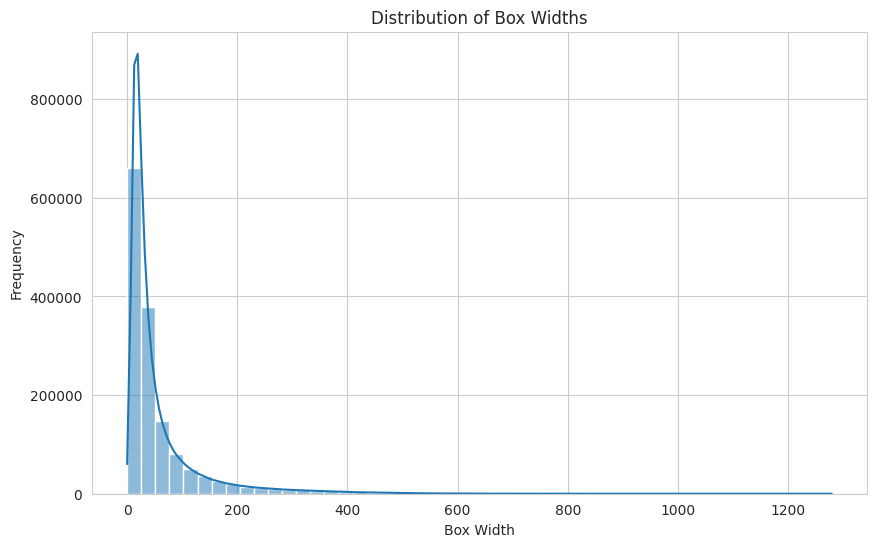

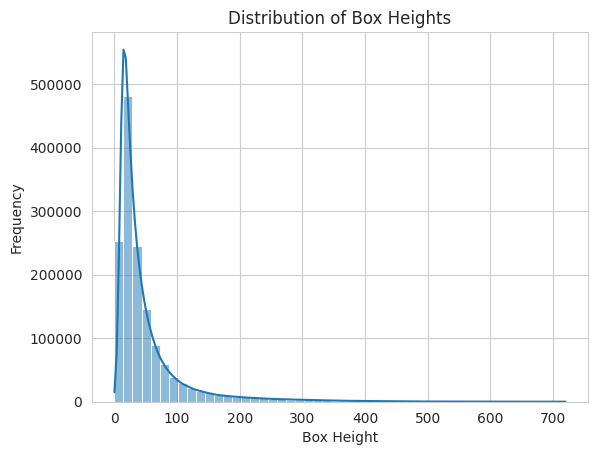

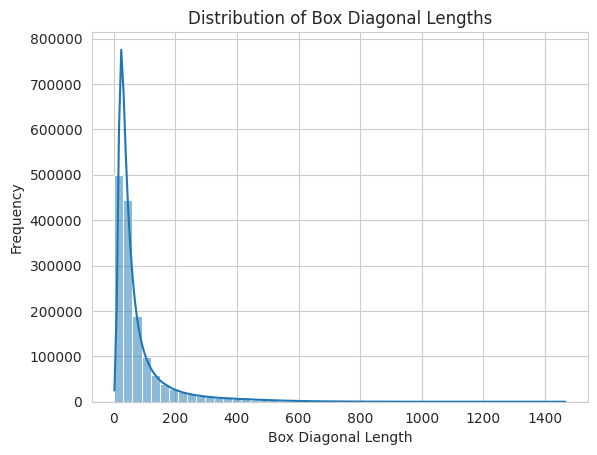

/tmp/ipykernel_411/3034239485.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=counts, palette="Blues_d")


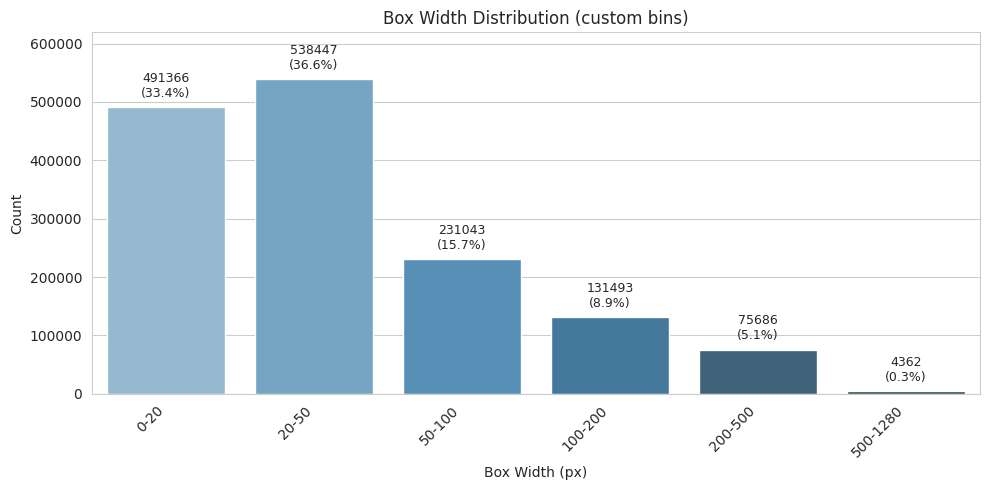

/tmp/ipykernel_411/3034239485.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=counts, palette="Blues_d")


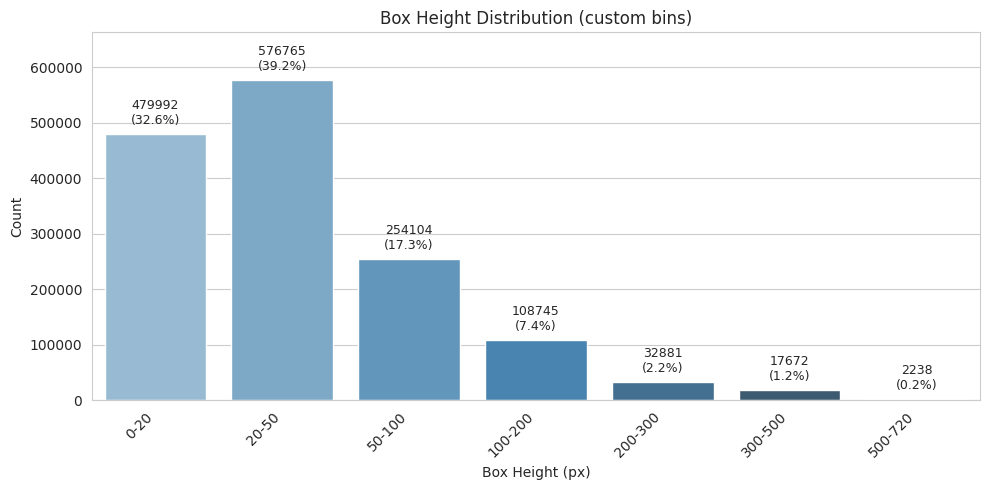

In [33]:
# Check boxes size distribution: visulize box size distribution using box width, height, area, area percentage

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot box width distribution
sns.histplot(df_box['box_width'], bins=50, kde=True)
plt.title("Distribution of Box Widths")
plt.xlabel("Box Width")
plt.ylabel("Frequency")
plt.show()

# Plot box height distribution
sns.histplot(df_box['box_height'], bins=50, kde=True)
plt.title("Distribution of Box Heights")
plt.xlabel("Box Height")
plt.ylabel("Frequency")
plt.show()

# # Plot box area distribution
# sns.histplot(df_box['box_area'], bins=50, kde=True)
# plt.title("Distribution of Box Areas")
# plt.xlabel("Box Area")
# plt.ylabel("Frequency")
# plt.show()

# # Plot box area percentage distribution
# sns.histplot(df_box['box_area_pct'], bins=50, kde=True)
# plt.title("Distribution of Box Area Percentages")
# plt.xlabel("Box Area Percentage")
# plt.ylabel("Frequency")
# plt.show()

#Plot box diagonal distribution
sns.histplot(df_box['box_diagonal'], bins=50, kde=True)
plt.title("Distribution of Box Diagonal Lengths")
plt.xlabel("Box Diagonal Length")
plt.ylabel("Frequency")
plt.show()



# custom binned bar plots with counts annotated on top (absolute + percent)
bins_width = [0, 20, 50, 100, 200, 500, int(df_box['image_width'].max())]
bins_height = [0, 20, 50, 100, 200, 300, 500, int(df_box['image_height'].max())]

def plot_binned_counts(series, bins, title, xlabel):
    counts, edges = np.histogram(series, bins=bins)
    labels = [f"{int(edges[i])}-{int(edges[i+1])}" for i in range(len(edges)-1)]
    x = np.arange(len(counts))

    plt.figure(figsize=(10,5))
    sns.barplot(x=x, y=counts, palette="Blues_d")
    plt.xticks(x, labels, rotation=45, ha='right')
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.title(title)

    ymax = counts.max() * 1.15
    plt.ylim(0, ymax)

    total = len(series)
    for i, c in enumerate(counts):
        pct = 100.0 * c / total
        plt.text(i, c + ymax*0.02, f"{c}\n({pct:.1f}%)", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Plot for widths and heights
plot_binned_counts(df_box['box_width'], bins_width, "Box Width Distribution (custom bins)", "Box Width (px)")
plot_binned_counts(df_box['box_height'], bins_height, "Box Height Distribution (custom bins)", "Box Height (px)")